## Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

## Read Data

In [35]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Preprocess Data

In [37]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [38]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [39]:
df['Gender'] = (df['Gender'] == 'Male').astype('int8')

<Axes: >

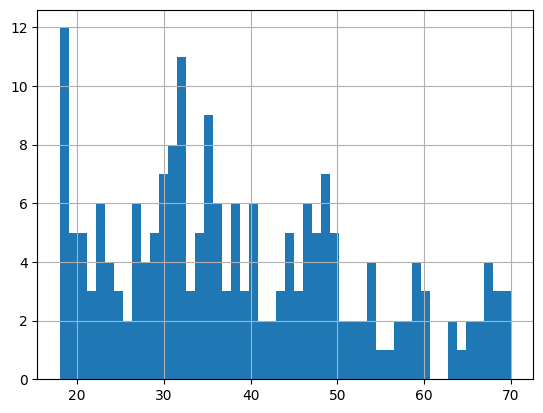

In [40]:
df.Age.hist(bins=50)

<Axes: >

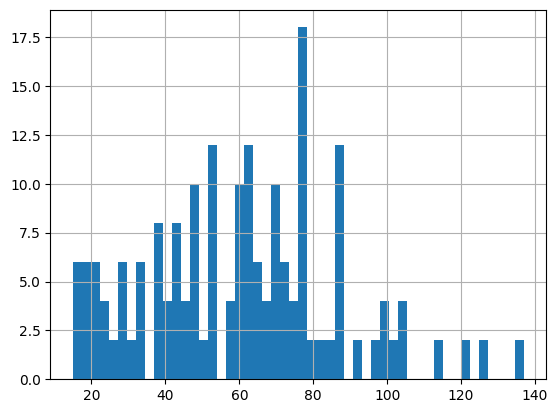

In [41]:
df['Annual Income (k$)'].hist(bins=50)

<Axes: >

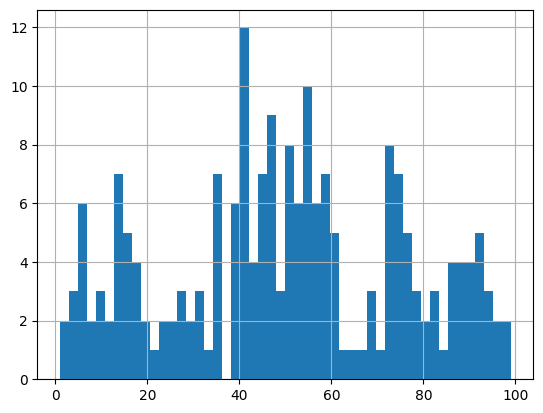

In [42]:
df['Spending Score (1-100)'].hist(bins=50)

In [45]:
std = StandardScaler()
cols_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

df[cols_to_scale] = std.fit_transform(df[cols_to_scale])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int8 
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 5.0 KB


In [47]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


## Use Model

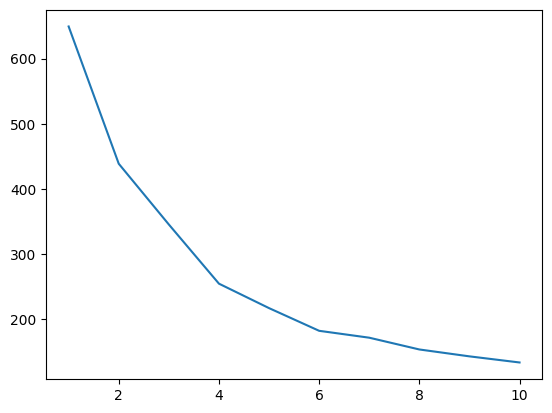

In [50]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)

plt.plot(range(1, 11), inertia);

In [51]:
model = KMeans(n_clusters=5, random_state=42)

In [56]:
y_pred = model.fit_predict(df)

In [57]:
y_pred

array([2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 4, 0, 4, 2, 4,
       0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 2,
       0, 4, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [58]:
model.cluster_centers_

array([[ 0.43103448,  1.19862745, -0.46098141, -0.32703818],
       [ 0.46153846, -0.44191719,  0.99158305,  1.23950275],
       [ 0.34042553, -0.78172248, -0.40306917, -0.21591396],
       [ 0.58823529,  0.17329545,  1.06645385, -1.2980103 ],
       [ 0.40909091, -0.97439592, -1.32954532,  1.13217788]])